<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#多分类" data-toc-modified-id="多分类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>多分类</a></span><ul class="toc-item"><li><span><a href="#数据集" data-toc-modified-id="数据集-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据集</a></span></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据可视化</a></span></li><li><span><a href="#将逻辑回归向量化" data-toc-modified-id="将逻辑回归向量化-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>将逻辑回归向量化</a></span></li><li><span><a href="#一对多分类器" data-toc-modified-id="一对多分类器-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>一对多分类器</a></span></li><li><span><a href="#变量初始化" data-toc-modified-id="变量初始化-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>变量初始化</a></span></li><li><span><a href="#预测" data-toc-modified-id="预测-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>预测</a></span></li></ul></li><li><span><a href="#神经网络" data-toc-modified-id="神经网络-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>神经网络</a></span><ul class="toc-item"><li><span><a href="#模型表达" data-toc-modified-id="模型表达-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>模型表达</a></span></li><li><span><a href="#前向传播" data-toc-modified-id="前向传播-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>前向传播</a></span></li></ul></li></ul></div>

# 多分类
这个部分需要你实现手写数字（0到9）的识别。你需要扩展之前的逻辑回归，并将其应用于一对多的分类。

## 数据集
这是一个MATLAB格式的.m文件，其中包含5000个20*20像素的手写字体图像，以及他对应的数字。另外，数字0的y值，对应的是10
用Python读取我们需要使用SciPy

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat 

In [14]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [15]:
data['X'].shape, data['y'].shape

((5000, 400), (5000, 1))

## 数据可视化

In [16]:
# 导入数据
sample_idx = np.random.choice(np.arange(data['X'].shape[0]), 100)
sample_images = data['X'][sample_idx, :]
sample_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
sample_images.shape

(100, 400)

In [35]:
sample_images[0][0]

0.0

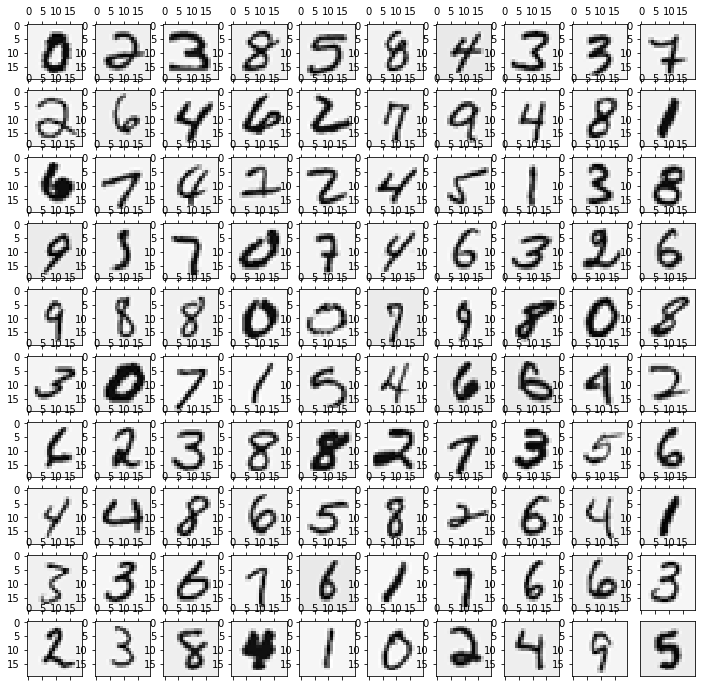

In [47]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        #ax[r, c].matshow(np.array(sample_images[r].reshape((20, 20))).T, cmap=matplotlib.cm.binary))
        ax[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

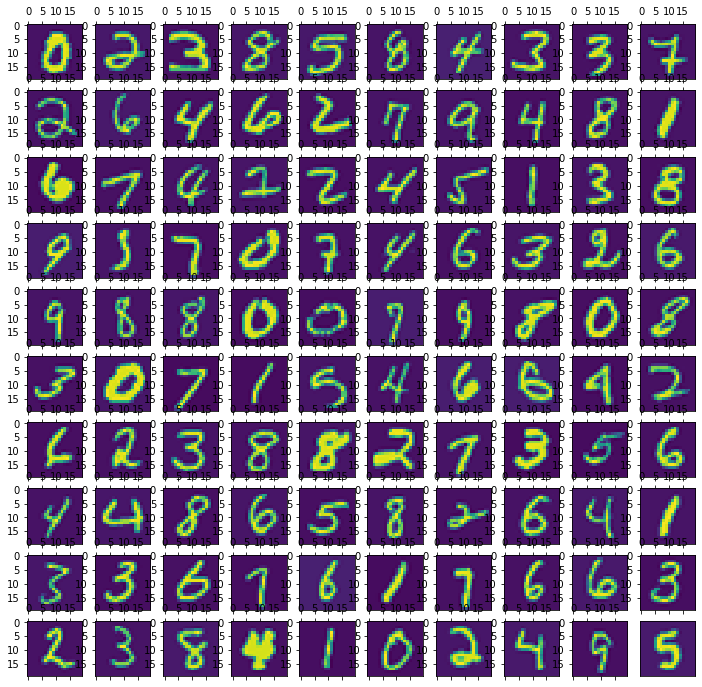

In [62]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax[r, c].matshow(np.array(sample_images[r*10+c].reshape((20, 20))).T)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 
plt.show()

## 将逻辑回归向量化

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

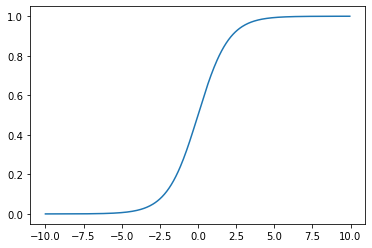

In [57]:
x = np.arange(-10, 10, 0.05)
plt.plot(x, sigmoid(x))
plt.show()

代价函数：
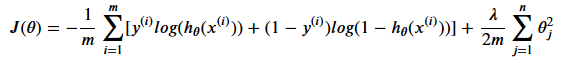

In [80]:
## 正则化代价函数
def costReg(theta, X, y, lambdaRate):
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.mat(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = lambdaRate / (2 * len(X)) * np.sum(np.power(theta[:, 1:], 2))
    return (1 / len(X) ) * np.sum((first - second)) + reg


梯度函数：
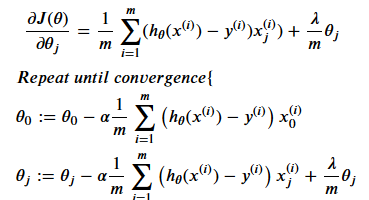

In [81]:
## 正则化梯度函数
def gradientReg(theta, X, y, lambdaRate):
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.mat(y)
    
    error = sigmoid(X * theta.T) - y
    grad = lambdaRate / len(X) * error.T * X
    reg = np.zeros(X.shape[1])
    reg[0] = 0
    reg[1:] = lambdaRate / len(X) * theta[:, 1:]
    return grad + reg

## 一对多分类器
现在我们已经定义了代价函数和梯度函数，现在是构建分类器的时候了。  
对于这个任务，我们有10个可能的类，并且由于逻辑回归只能一次在2个类之间进行分类，我们需要多类分类的策略。  
在本练习中，我们的任务是实现一对一全分类方法，其中具有k个不同类的标签就有k个分类器，每个分类器在“类别 i”和“不是 i”之间决定。  
我们将把分类器训练包含在一个函数中，该函数计算10个分类器中的每个分类器的最终权重，并将权重返回为k*(n + 1)数组，其中n是参数数量。  

In [82]:
from scipy.optimize import minimize

def one_vs_all(X, y, num_labels, lambdaRate):  # theta不变化，只用于minimize函数中的初始化，为常量，故形参中不必写theta
    (m, n) = X.shape  # 这里的X认为已经加了全1的首列
    all_theta = np.zeros((num_labels, n)) # 初始化all_theta的行列
    for k in range(1, num_labels+1): # k代表分类标签1 - 10
        # 首先把theta初始化了,等会儿用于minimize函数中
        theta = np.zeros(n)
        # 关键的是针对不同类别训练时的y不同，X都是一样的
        y_k = np.array([1 if label == k else 0 for label in y]) # 对每一个类别训练重新构造出一套新的标签值
        y_k = np.reshape(y_k, (m, 1)) # 将y_k转化为列
        res = minimize(fun=costReg, x0=theta, args=(X, y_k, lambdaRate), method='TNC', jac=gradientReg)
        all_theta[k-1, :] = res.x # k是从1开始的，故要减1
    return all_theta

In [83]:
# 检验下各变量维度
X = np.insert(data['X'], 0, values=np.ones(len(X)), axis=1)

(m, n) = X.shape
all_theta = np.zeros((10, n))
theta = np.zeros(n)
y_1 = np.array([1 if label == 1 else 0 for label in data['y']])
y_1 = np.reshape(y_1, (m, 1))

X.shape, y_1.shape, theta.shape, all_theta.shape

((5000, 401), (5000, 1), (401,), (10, 401))

## 变量初始化

In [87]:
np.unique(data['y']) # 看下有几类标签

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [84]:
# 初始化变量
X = np.insert(data['X'], 0, values=np.ones(len(X)),axis=1)
y = data['y']

In [86]:
all_theta = one_vs_all(X, y, num_labels=10, lambdaRate=1)
all_theta

array([[-2.38294241e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30489428e-03, -8.60063840e-10,  0.00000000e+00],
       [-3.18685691e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45072767e-03, -5.07431770e-04,  0.00000000e+00],
       [-4.79893439e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87485643e-05, -2.47707928e-07,  0.00000000e+00],
       ...,
       [-7.98507567e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.95113631e-05,  7.22359758e-06,  0.00000000e+00],
       [-4.57208604e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33573470e-03,  9.98450909e-05,  0.00000000e+00],
       [-5.40493650e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16645849e-04,  7.88228236e-06,  0.00000000e+00]])

In [90]:
all_theta.shape

(10, 401)

## 预测

In [98]:
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [99]:
np.argmax(a, axis=0) #0代表列

array([1, 1, 1], dtype=int64)

In [101]:
np.argmax(a, axis=1) #0代表行

array([2, 2], dtype=int64)

In [107]:
b = np.array([2, 3, 5, 1, 81, 5, 40, 9])
b

array([ 2,  3,  5,  1, 81,  5, 40,  9])

In [109]:
b.argsort() # 输出数值从小到大顺序的索引

array([3, 0, 1, 2, 5, 7, 6, 4], dtype=int64)

In [114]:
# 预测函数
def predict(all_theta, X):
    all_theta = np.mat(all_theta)
    X = np.mat(X)
    
    h = sigmoid(all_theta * X.T) 
    h_argmax = np.argmax(h, axis=0) #0代表列
    
    return h_argmax + 1

In [115]:
y_pred = predict(all_theta, X)
print(y_pred)

[[10 10 10 ...  9  9  7]]


In [118]:
y_pred.shape, data['y'].shape

((1, 5000), (5000, 1))

In [121]:
# 预测结果与真实标签对比
from sklearn.metrics import classification_report#这个包是评价报告

print(classification_report(data['y'], y_pred.reshape((5000, 1))))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



# 神经网络
在前面一个部分，我们已经实现了多分类逻辑回归来识别手写数字。但是，逻辑回归并不能承载更复杂的假设，因为他就是个线性分类器。  
这部分，你需要实现一个可以识别手写数字的神经网络。神经网络可以表示一些非线性复杂的模型。权重已经预先训练好，你的目标是在现有权重基础上，实现前馈神经网络。   

## 模型表达
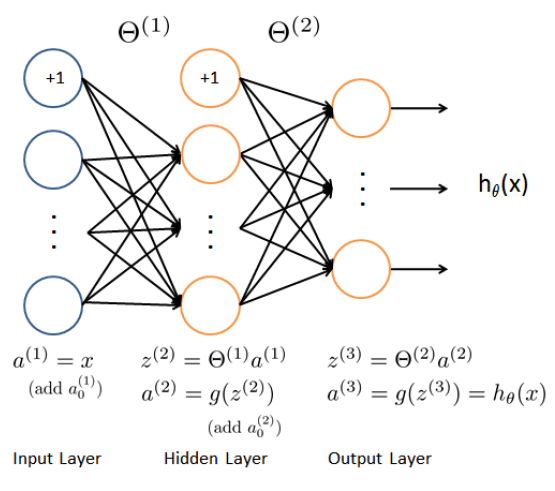

输入是图片的像素值，20*20像素的图片有400个输入层单元，不包括需要额外添加的加上常数项。
材料已经提供了训练好的神经网络的参数theta1和theta2，有25个隐层单元和10个输出单元（10个输出）

## 前向传播
你需要实现前馈神经网络预测手写数字的功能。和之前的一对多分类一样，神经网络的预测会把 h 中值最大的，作为预测输出

In [125]:
weight = loadmat('ex3weights.mat')
weight

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [126]:
theta1 = weight['Theta1']
theta2 = weight['Theta2']

In [127]:
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [172]:
# 插入常数项
X2 = np.mat(np.insert(data['X'], 0, np.ones(len(X)), axis=1))
y2 = np.mat(data['y'])

X2.shape, y2.shape, theta1.shape, theta2.shape

((5000, 401), (5000, 1), (25, 401), (10, 26))

输入层

In [173]:
a1 = X2

In [174]:
z2 = a1 * theta1.T
z2.shape

(5000, 25)

第二层

In [175]:
a2 = sigmoid(z2)
a2.shape

(5000, 25)

In [176]:
a2 = np.insert(a2, 0, values=np.zeros(len(a2)), axis=1)
a2.shape

(5000, 26)

In [177]:
z3 = a2 * theta2.T
z3.shape

(5000, 10)

输出层

In [178]:
a3 = sigmoid(z3)
a3.shape

(5000, 10)

In [179]:
a3

matrix([[2.41112362e-04, 3.22516409e-03, 5.02214375e-03, ...,
         8.48691701e-04, 1.25441846e-02, 9.97305105e-01],
        [1.02476020e-03, 4.47037277e-03, 6.84549670e-03, ...,
         5.04346962e-03, 3.82991499e-03, 9.97281643e-01],
        [1.89558621e-04, 5.99832073e-03, 4.96318176e-02, ...,
         1.23181885e-01, 1.06519373e-02, 9.53353260e-01],
        ...,
        [1.04621138e-01, 7.05754861e-03, 5.73480643e-02, ...,
         4.55024380e-03, 7.83270054e-01, 3.84292153e-05],
        [1.77621987e-03, 1.15316578e-03, 6.26451636e-04, ...,
         2.49133988e-02, 9.85112829e-01, 3.26846046e-04],
        [1.03048376e-04, 8.50752744e-04, 4.28648472e-05, ...,
         1.20506198e-02, 8.17012263e-01, 1.23848622e-01]])

In [170]:
y_pred = np.argmax(a3, axis=1) + 1
y_pred

matrix([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=int64)

In [181]:
y_pred.shape

(5000, 1)

In [180]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.98       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.97       500
          10       0.99      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

